<div class="alert alert-block alert-info">

[1. The needed steps](#1st-bullet)<br>
- [1.1 Import the needed libraries](#2nd-bullet)<br>
- [1.2 Import the dataset](#3rd-bullet)<br>
- [1.3. Data pre-processing, data partition and scaling](#4th-bullet)<br>
    
[2. Feature Selection](#5th-bullet)<br>
- [2.1 Filter methods](#6th-bullet)<br>
    - [2.1.1 Univariate variables](#7th-bullet)<br>
    - [2.1.2 Correlation Indices](#8th-bullet)<br>
    - [2.1.3 Chi-Square](#9th-bullet)<br>
- [2.2 Wrapper Methods](#10th-bullet)<br>
    - [2.2.1 RFE](#11th-bullet)<br>
- [2.3 Embedded Methods](#12th-bullet)<br>
    - [2.3.1 Lasso](#13th-bullet)<br>
- [2.4 Final Insights](#14th-bullet)<br>
    
</div>

## Import 

### Import Libraries

In [1]:
## Import standard data processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Import datetime object for date columns in dataset
from datetime import datetime

## Setting seaborn style
sns.set()

from math import ceil

## Import train_test_split to split data for model training
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None) #Show all columns


## Import library that enables colours in Markdowns
from IPython.display import Markdown

## Supress warnings
import warnings
warnings.filterwarnings('ignore')


## Created functions

In [2]:
# Function to create plots  
def univariate_analysis(data, variable, target_variable='Claim Injury Type', figsize=(9, 6)):
    
    plt.figure(figsize=figsize)

    df_plot = data.copy()

    order = df_plot.groupby(variable)[target_variable].value_counts().unstack().sum(axis=1).sort_values(ascending=False).index

    sns.countplot(x=variable, hue=target_variable, data=df_plot, order=order)


    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.title(f'Number of Tests by {target_variable} and {variable}')

    plt.tight_layout()
    plt.show()


## 1. Dataset overview

### Import Datasets

In [3]:
train_data = pd.read_csv("train_data.csv", low_memory=False)
test_data = pd.read_csv("test_data.csv")

### 1.1 Descriptive analysis

In [ ]:
train_data.head()


In [ ]:
test_data.head()

In [ ]:
test_data.columns.values

In [ ]:
train_data.columns.values

In the Train there is no Agreement Reach variable and WCB Decision becuase maybe it is the information that is known after defininig the target variable

In [8]:
# set "Claim Identifier" as the index for the train and test datasets
train_data = train_data.set_index("Claim Identifier")
test_data = test_data.set_index("Claim Identifier")

In [ ]:
train_data.describe(include="all").T

In [ ]:
train_data.info()

## DATA TYPES:
# Convert accident date (to date type)
# convert age (to int)
# Alternative dispute resolution (??)
# Assembly date (to date type)
# birth year (to int)
# C2 date (to date type)
# C3 date (to date type)
# First hearing date (to date)
# IME-4 count (to int)
# Industry code (object)
# OIICS Nature of Injury Description (to object) - all nulls (relevant??)
# WCIO cause of injury code (float to object)
# WCIO Nature of Injury Code (float to object)
# WCIO Part Of Body Code (float to object)
# Agreement reached (??) - boolean/ int(???)
# Number of dependents (to int)

In [ ]:
test_data.info()

#### Changing the data types


In [12]:
train_data["Age at Injury"] = train_data["Age at Injury"].astype("Int64")
test_data["Age at Injury"] = test_data["Age at Injury"].astype("Int64")

train_data["Number of Dependents"] = train_data["Number of Dependents"].astype("Int64")
test_data["Number of Dependents"] = test_data["Number of Dependents"].astype("Int64")

train_data["Birth Year"] = train_data["Birth Year"].astype("Int64")
test_data["Birth Year"] = test_data["Birth Year"].astype("Int64")

train_data["WCIO Part Of Body Code"] = train_data["WCIO Part Of Body Code"].astype("Int64")
test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].astype("Int64")

train_data["WCIO Nature of Injury Code"] = train_data["WCIO Nature of Injury Code"].astype("Int64")
test_data["WCIO Nature of Injury Code"] = test_data["WCIO Nature of Injury Code"].astype("Int64")

train_data["WCIO Cause of Injury Code"] = train_data["WCIO Cause of Injury Code"].astype("Int64")
test_data["WCIO Cause of Injury Code"] = test_data["WCIO Cause of Injury Code"].astype("Int64")

train_data["Industry Code"] = train_data["Industry Code"].astype("Int64")
test_data["Industry Code"] = test_data["Industry Code"].astype("Int64")

train_data["Agreement Reached"] = train_data["Agreement Reached"].astype("Int64")

train_data["Accident Date"] = pd.to_datetime(train_data['Accident Date'], format = '%Y-%m-%d')
test_data["Accident Date"] = pd.to_datetime(test_data['Accident Date'], format = '%Y-%m-%d')

train_data["Assembly Date"] = pd.to_datetime(train_data['Assembly Date'], format = '%Y-%m-%d')
test_data["Assembly Date"] = pd.to_datetime(test_data['Assembly Date'], format = '%Y-%m-%d')

train_data["C-2 Date"] = pd.to_datetime(train_data['C-2 Date'], format = '%Y-%m-%d')
test_data["C-2 Date"] = pd.to_datetime(test_data['C-2 Date'], format = '%Y-%m-%d')

train_data["C-3 Date"] = pd.to_datetime(train_data['C-3 Date'], format = '%Y-%m-%d')
test_data["C-3 Date"] = pd.to_datetime(test_data['C-3 Date'], format = '%Y-%m-%d')


## 2. Data Cleaning

### 2.1 Duplicates

In [ ]:
duplicates_sum_train = train_data.duplicated().sum()
duplicates_sum_test = test_data.duplicated().sum()

print(f"There are {duplicates_sum_train} in the training data set.")
print(f"There are {duplicates_sum_test} in the test data set.")

In [14]:
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

### 2.2 Target variable - Claim Injury Type Missing & Unique values

In [ ]:
train_data["Claim Injury Type"].unique()

In [ ]:
train_data['Claim Injury Type'].value_counts()

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Claim Injury Type', data=train_data)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.xticks(rotation=45)  


plt.tight_layout()  
plt.show()

In [ ]:
missing_data_target = train_data[train_data['Claim Injury Type'].isna()]
missing_data_target.head()

In [ ]:
missing_data_target.info()
# all features with missing values on the target, are also missing, except Assembly Date -> not relevant (decision -> drop rows)

In [20]:
train_data= train_data.drop(missing_data_target.index)

Re chack for unique values in the target variable

In [ ]:
train_data["Claim Injury Type"].unique().tolist()

### Data Visualisation

In [22]:
### Define metric & non-metric features
metric_features = ["Age at Injury", "Average Weekly Wage", "Birth Year", "IME-4 Count", "Number of Dependents"]

non_metric_features = ["OIICS Nature of Injury Description","Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code", "Accident Date", "Alternative Dispute Resolution",
                       "Assembly Date", "Attorney/Representative", "C-2 Date", "C-3 Date", "Carrier Name", "Carrier Type", "County of Injury", "COVID-19 Indicator",
                       "District Name", "First Hearing Date", "Gender", "Industry Code Description", "Medical Fee Region", "WCIO Cause of Injury Description", 
                       "WCIO Nature of Injury Description", "WCIO Part Of Body Description", "Zip Code", "Agreement Reached", "WCB Decision"]


### Histograms for Metric Variables

### - Age at Injury

In [ ]:
train_data['Age at Injury'].plot(
    kind='hist',
    bins=20
)

plt.title('Histogram of Age at Injury')
plt.xlabel('Age at Injury')
plt.ylabel('Frequency') 
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_data['Age at Injury'])

# Add labels and title
plt.xlabel("Age at Injury")
plt.title("Box Plot of Age at Injury")

# Show plot
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train_data['Age at Injury'].quantile(0.25)
Q3 = train_data['Age at Injury'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
num_outliers = ((train_data['Age at Injury'] < lower_bound) | (train_data['Age at Injury'] > upper_bound)).sum()
print(f'Number of outliers (IQR method): {num_outliers}')


### Histograms for Non Metric Variables

In [26]:
# for column in non_metric_features:
#     top_categories = train_data[column].value_counts().head(10)

   
#     plt.figure(figsize=(8, 4))
#     sns.barplot(
#         y=top_categories.index,  
#         x=top_categories.values, 
#         palette='tab20b', 
#          hue=top_categories.index, 
#         legend=False 
#     )  

#     plt.title(f'Histogram for {column}')
#     plt.xlabel('Count', fontsize=14)
#     #plt.ylabel(column, fontsize=14)

   
#     plt.tight_layout()
#     plt.show()

In [27]:
# for column in non_metric_features:
#     top_categories = train_data[column].value_counts().head(10)

   
#     plt.figure(figsize=(8, 4))
#     sns.barplot(
#         x=top_categories.index,  
#         y=top_categories.values, 
#          hue=top_categories.index, 
#         legend=False 
#     )  

#     plt.title(f'Histogram for {column}')
#     #plt.xlabel('Count', fontsize=14)
#     #plt.xticks(rotation=90)
#     #plt.ylabel(column, fontsize=14)

   
#     plt.tight_layout()
#     plt.show()

### 2.3 All independent variables - Missing & Unique Values

#### All listed Variables - summary 

1. **Accident Date**: 0.64% NaN and dates (5539 unique values)

2. **Age at Injury**: 0% NaN and no strange values (108 unique values) (there are some values >100)
3. **Alternative Dispute Resolution**: 0% NaN and no strange values (3 unique values)
4. **Assembly Date**: 0% NaN and dates (897 unique values)
5. **Attorney/Representative**: 0% NaN and no strange values (2 unique values)
6. **Average Weekly Wage**: around 5% NaN and a lot of unique values (120024 unique values)
7. **Birth Year**: 5% Nan and one 25081 strange values "0" (Birth Year cannot be 0) (107 unique values - 0 included)
8. **C-2 Date**: 2.5% NaN and dataes (2475 unique values)
11. **Carrier Name**: 0% NaN and name of carrier (2046 unique values) 
12. **Carrier Type**: 0% NaN and no strange values (8 unique values)
13. **Claim Injury Type** - target variable
14. **County of Injury**: 0% NaN and there are 1196 "UNKNOWN" values (63 unique values)
15. **COVID-19 Indicator**: 0% NaN and no strange values (2 unique values)
16. **District Name**: 0% NaN and no strange values (8 unique values)
17. **First Hearing Date**: 73.7% NaN and dates (1094 unique values)
18. **Gender**: 0% NaN and male, female, non-binary and unspecified (4 unique values)
19. **Industry Code**: 1.73% NaN and no strange values (24 unique values)
20. **Industry Code Description**: 1.73% NaN and descripion (20 unique values)
21. **Medical Fee Region**: 0% NaN and one strange value 'UK' (33472 such values) other are numbers (4 unique values)
22. **WCIO Cause of Injury Code**: 2.724% NaN and no strange values (77 unique values) 
23. **WCIO Cause of Injury Description**: 2.724% NaN and no strange values (74 unique values)
24. **WCIO Nature of Injury Code**: 2.727% NaN and no strange values (56 unique values)
25. **WCIO Nature of Injury Description**: 2.727% NaN and no strange values (56 unique values)
26. **WCIO Part Of Body Code**: 2.98% NaN and 42011 "-9" values (should be treated as missing value) (57 unique values)
27. **WCIO Part Of Body Description**: 2.98% NaN andone strange value: INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED (54 unique values)
28. **Zip Code**: 4.98% NaN and zip code is a bit strange -> it has a lot of unique values, some zip codes starts with numbers and there are som that starts with letters; one zip code unique value is 'UNKNO". According to definition of Zip-Code: zip codes only contain a combination of numeric values.
29. **Agreement Reached**: 0% NaN and no strange values (2 unique values)
30. **WCB Decision**: 0% NaN and only 1 unique value -> variable that should be deleted it is not informative
31. **Number of Dependents**: 0% NaN and no strange values (7 unique values)



##### a) Checking unique values in each of the variable (looking for some values that can indicate missing values)

In [ ]:
for column in train_data.columns:
    unique_values = train_data[column].unique()
    unique_values_num = train_data[column].nunique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print(f"Number of unique values in '{column}':")
    print(unique_values_num)
    
    print()

In [ ]:
train_data['Age at Injury'].value_counts()

After reviewing unique values in the dataset we also found in some variables unique values such as e.g "UNKNOWN", "UK", "UNKNO". Also, we saw 
Therefore, we changed that values to missing values.

In [30]:
# Filling missing values with NaN

train_data.replace('UNKNOWN', np.nan, inplace = True)
test_data.replace('UNKNOWN', np.nan, inplace = True)

train_data.replace('UK', np.nan, inplace = True)
test_data.replace('UK', np.nan, inplace = True)

train_data.replace('UNKNO', np.nan, inplace = True)
test_data.replace('UNKNO', np.nan, inplace = True)


# There are such strange values in the gender U and X
train_data['Gender'].replace('X', np.nan, inplace = True)
test_data['Gender'].replace('X', np.nan, inplace = True)

train_data['Gender'].replace('U', np.nan, inplace = True)
test_data['Gender'].replace('U', np.nan, inplace = True)

# There are some values in Age that are equal to 0

train_data['Age at Injury'].replace(0, np.nan, inplace = True)
test_data['Age at Injury'].replace(0, np.nan, inplace = True)


# We also looked deeper into ZipCode variable and it has several zipcode that are not valid zipcodes. Those values are: ".1605", "00000" and "99999"
train_data['Zip Code'].replace([".1605", "00000", "99999"], np.nan, inplace=True)
test_data['Zip Code'].replace([".1605", "00000", "99999"], np.nan, inplace=True)

train_data["Birth Year"].replace(0, np.nan, inplace=True)
test_data["Birth Year"].replace(0, np.nan, inplace=True)

## Data Visualisation
#### Histograms (Margarida) and Boxplots (treating outliers) (Eduardo)

Variable ***Zip Code*** has a lot of unique values. Therefore, we decided to group Zip Code 

In [ ]:
train_data["Zip Code"].value_counts(dropna=False).sort_index()

In [ ]:
# Creating new variable zip_code dividied into categories 
def categorize_zip(zip_code):
    if pd.isna(zip_code):  # Check if the value is NaN
        return np.nan 
    elif isinstance(zip_code, str) and zip_code[0].isdigit():
        return zip_code[0]
    else:
        return "Other"


# Apply the function to create the new 'zip_code_cat' column
train_data['zip_code_cat'] = train_data['Zip Code'].apply(categorize_zip)
test_data['zip_code_cat'] = test_data['Zip Code'].apply(categorize_zip)

# If you want to see the distribution of the new category
print(train_data['zip_code_cat'].value_counts(dropna=False))


In [33]:
train_data =train_data.drop('Zip Code', axis=1)
test_data = test_data.drop('Zip Code', axis=1)

There is also strange value in the variable WCIO Part Of Body Code. According WCIO website there is no such code as -9. We checked with variable WCIO Part of Body Description which description corresponds to Code -9 in our data set. We found out that -9 is always associated with description "Multiple".

In [ ]:
# Display only rows where "WCIO Part Of Body Code" equals -9
filtered_data_train = train_data[train_data["WCIO Part Of Body Code"] == -9]

# Display the result
filtered_data_train["WCIO Part Of Body Description"].value_counts()

# Display only rows where "WCIO Part Of Body Code" equals -9
filtered_data_test = test_data[test_data["WCIO Part Of Body Code"] == -9]

# Display the result
filtered_data_test["WCIO Part Of Body Description"].value_counts()


In [35]:
# columns_to_plot =['Gender', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type','COVID-19 Indicator','District Name','Medical Fee Region', 'Agreement Reached','Number of Dependents' ]
# for hue_variable in columns_to_plot:
#         univariate_analysis(train_data, hue_variable )

##### b) Checking the number of missing values in each variable in the train_data (number and percentage)

In [ ]:
missing_values = train_data.isnull().sum().sort_values(ascending=False)
print(missing_values)

In [ ]:
missing_percentage = ((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False)
print(missing_percentage)

Variables such as ***OIICS Nature of Injury Descritpion, IME-4 Count, First Hearing Date*** and ***C-3 Date*** have more than 60% of missing values. 
<br> We decided to drop ***OIICS Nature of Injury Descritpion, IME-4 Count and ***C-3 Date*** becuase they have so many missing values that it does not make sense to impute them (not enough information for taking that as sample for the whole population).
<br> We do not drop ***First Hearing Date*** variable, because blank date (missing value) means the claim has not yet had a hearing held. Thus, it is an information that we want to keep.




In [38]:
columns_to_drop = ['IME-4 Count','C-3 Date', 'OIICS Nature of Injury Description']

train_data =train_data.drop(columns_to_drop, axis=1)
test_data = test_data.drop(columns_to_drop, axis=1)

metric_features.remove('IME-4 Count')
non_metric_features.remove('OIICS Nature of Injury Description')

We decided to drop variable WCB Decision, because it only contains one unique value, so it is not informative.

In [39]:
train_data =train_data.drop('WCB Decision', axis =1)
non_metric_features.remove('WCB Decision')

We decided to change vairable First Hearing Date to binary variable, where NaN values are replaced by 0 - it means that claim has not had a hearing held yet and dataes are replaced by 1 which means that hearings has been already held.

In [ ]:
train_data['First Hearing Date Binary'] = train_data['First Hearing Date'].notna().astype(int)
train_data[['First Hearing Date', 'First Hearing Date Binary']].head()

In [ ]:
test_data['First Hearing Date Binary'] = test_data['First Hearing Date'].notna().astype(int)
test_data[['First Hearing Date', 'First Hearing Date Binary']].head()

In [42]:
# univariate_analysis(train_data, 'First Hearing Date Binary')

First Hearing Data variable can be droped after creating binary variable.

In [43]:
train_data =train_data.drop("First Hearing Date", axis=1)
test_data =test_data.drop("First Hearing Date", axis=1)

In [ ]:
WCIO_columns = [
    'WCIO Part Of Body Code', 
    'WCIO Part Of Body Description', 
    'WCIO Nature of Injury Description', 
    'WCIO Nature of Injury Code', 
    'WCIO Cause of Injury Description', 
    'WCIO Cause of Injury Code'
]

# Display rows where all WCIO columns contain NaN values
WCIO_nan_rows = train_data[train_data[WCIO_columns].isna().all(axis=1)]

count_all_nan_WCIO = train_data[WCIO_columns].isna().all(axis=1).sum()
print("Rows with all NaN values in WCIO columns:", count_all_nan_WCIO)


# Calculate the percentage of these rows in the whole dataset
percentage_all_nan_WCIO = (count_all_nan_WCIO / len(train_data)) * 100

# Display the result
print(f"Percentage of rows with all NaN values in WCIO columns: {percentage_all_nan_WCIO:.2f}%")
WCIO_nan_rows.head()


Dropping rows where all WCIO columns contain NaN values.

In [45]:
train_data = train_data[~train_data[WCIO_columns].isna().all(axis=1)]

In [ ]:
missing_percentage = ((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

In [47]:
columns_to_drop_desc = ['WCIO Part Of Body Description','Industry Code Description','WCIO Nature of Injury Description','WCIO Cause of Injury Description', 'Carrier Name']

train_data =train_data.drop(columns_to_drop_desc, axis=1)
test_data =test_data.drop(columns_to_drop_desc, axis=1)

# remove the dropped columns from the list of metric/non-metric features
for x in non_metric_features:
    non_metric_features.remove(x)

In [ ]:
train_data.nunique()

### Splitting into training and validation set

In [49]:
X = train_data.drop('Claim Injury Type', axis = 1)
y = train_data['Claim Injury Type']

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)


#### After splitiing into training and validation set we can deal with all missing values

Acording to WCIO website codes that contains in the description word multiple are: 10, 20, 30, 40, 50, 90, 91. Thus, we decided to fill -9 those values with mode amonog codes that corresponds to multiple. We used mode to replace -9 becuase WCIO Part of Body Code is a categorical variable.

In [ ]:
# Define the valid codes for "Multiple"
multiple_codes = [10, 20, 30, 40, 50, 90, 91]

# Calculate the mode among the valid multiple codes
mode_value = X_train[X_train["WCIO Part Of Body Code"].isin(multiple_codes)]["WCIO Part Of Body Code"].mode()[0]

# Replace only -9 values with the mode, leaving other NaN values unchanged
X_train["WCIO Part Of Body Code"] = X_train["WCIO Part Of Body Code"].replace(-9, mode_value)

test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].replace(-9, mode_value)

X_val["WCIO Part Of Body Code"] = X_val["WCIO Part Of Body Code"].replace(-9, mode_value)


print(X_train["WCIO Part Of Body Code"].value_counts(dropna=False))

Checking the percentage of misssing values after deleting WCIO rows

##### Dealing with remaning missing values

1. There is a chance that ***Birth Year*** is correlated with Age at the Injury, so we do not take care of missing values for now.

In [52]:
median_birth_year = X_train["Birth Year"].median()
X_train["Birth Year"].fillna(median_birth_year, inplace=True)

X_val["Birth Year"].fillna(median_birth_year, inplace=True)
test_data["Birth Year"].fillna(median_birth_year, inplace=True)

2. All missing values in the variable ***Average Weekly Wage*** are replaced by using median (it is a continous variable)

In [53]:
median_wage = X_train["Average Weekly Wage"].median()
X_train["Average Weekly Wage"].fillna(median_wage, inplace=True)

X_val["Average Weekly Wage"].fillna(median_wage, inplace=True)
test_data["Average Weekly Wage"].fillna(median_wage, inplace=True)


3. Replacing missing values in variable Age at Injury with mean (That variable is almost normal distributed)

In [54]:
mean_age = int(X_train["Age at Injury"].mean())

X_train["Age at Injury"].fillna(mean_age, inplace=True)

X_val["Age at Injury"].fillna(mean_age, inplace=True)

test_data["Age at Injury"].fillna(mean_age, inplace=True)

4. Replacing missing values in ***zip_code_cat*** with mode - categorical variable

In [ ]:
mode_value = X_train['zip_code_cat'].mode()[0]  

# Replace NaN values in 'zip_code_cat' with the mode
X_train['zip_code_cat'].fillna(mode_value, inplace=True)
X_val['zip_code_cat'].fillna(mode_value, inplace=True)
test_data['zip_code_cat'].fillna(mode_value, inplace=True)

# Display the updated DataFrame and the distribution of the new category
X_train['zip_code_cat'].value_counts(dropna=False)  # Include NaN if still any 

5. Variables that has less than 1% of with missing values

In [56]:
# List of categorical columns that missing values should be replaced with mode
mode_variables = [
    'Medical Fee Region',
    'zip_code_cat',
    'WCIO Part Of Body Code',
    #'WCIO Part Of Body Description',
    'WCIO Nature of Injury Code',
    #'WCIO Nature of Injury Description',
    #'WCIO Cause of Injury Description',
    'WCIO Cause of Injury Code',
    'C-2 Date',
    'Industry Code',
    #'Industry Code Description',
    'Gender',
    'Accident Date',
    'Carrier Type',
    'County of Injury'
]

In [57]:
# C-2 Date' and Accident Date those missing values could be treated a bit better, there is a possibility that 

In [58]:
for column in mode_variables:
    mode_value = X_train[column].mode()
    if not mode_value.empty:
        X_train[column] = X_train[column].fillna(mode_value[0])
        X_val[column] = X_val[column].fillna(mode_value[0])  
        test_data[column] = test_data[column].fillna(mode_value[0])

In [ ]:
X_train["Days Between Accident_Assembly"] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days
negative_count = (X_train["Days Between Accident_Assembly"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_Assembly':", negative_count)


In [ ]:
X_val["Days Between Accident_Assembly"] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days
negative_count = (X_val["Days Between Accident_Assembly"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_Assembly' in validation set:", negative_count)


In [ ]:
X_train["Days Between Accident_C2"] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days
negative_count = (X_train["Days Between Accident_C2"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_C2' in train set:", negative_count)

In [ ]:
X_val["Days Between Accident_C2"] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days
negative_count = (X_val["Days Between Accident_C2"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_C2' in validation set:", negative_count)

In [ ]:
X_train.isna().sum().sort_values(ascending=False)

In [ ]:
X_val.isna().sum().sort_values(ascending=False)

In [ ]:
test_data.isna().sum().sort_values(ascending=False)

## Outliers

Let's start by plotting some box plots to see the behaviour of the dataset on the metric features

In [ ]:
print(metric_features)

In [ ]:
# Plot ALL Numeric Variables' Histograms in one figure

sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


# Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(10, 6),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train[feat], ax=ax)
    
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

In [ ]:
#Plotting the numeric variables' box plot all in one figure
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Numeric Variables' Box Plots", fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Define colors for each plot
colors = sns.color_palette("pastel")

# Creating box plots with improvements
sns.boxplot(data=X_train, x='Age at Injury', ax=axes[0, 0], color=colors[0])
sns.boxplot(data=X_train, x='Average Weekly Wage', ax=axes[0, 1], color=colors[1])             # Log scale example
sns.boxplot(data=X_train, x='Birth Year', ax=axes[1, 0], color=colors[2])
sns.boxplot(data=X_train, x='Number of Dependents', ax=axes[1, 1], color=colors[4])

# Rotate x-axis labels if needed
for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)

plt.show()

### Outlier Removal

In [ ]:
#Start by computing the interquartile range
q1 = train_data[metric_features].quantile(0.25)
q3 = train_data[metric_features].quantile(0.75)
iqr = q3 - q1

#Now we are going to compute the limits:
lower_lim = q1 - (1.5 * iqr)
upper_lim = q3 + (1.5 * iqr)

for feature in metric_features:
    print(f"{feature:<25}  Lower Limit: {lower_lim[feature]:>10}      Upper Limit: {upper_lim[feature]:>10}")

Let's detect 'obvious' outliers, those where every characteristic in outside the interquartile range

In [ ]:
def identify_outliers(train_data, metric_features, lower_lim, upper_lim):
    outliers = {}
    obvious_outliers = []

    for metric in metric_features:
        if metric not in train_data.columns:
            continue
        
        if metric not in lower_lim or metric not in upper_lim:
            continue
        
        outliers[metric] = []
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        
        for i, value in enumerate(train_data[metric]):
            if pd.isna(value):
                continue
            
            if value < llim or value > ulim:
                outliers[metric].append(value)
        
        print(f"Total outliers in {metric}: {len(outliers[metric])}")

    # Check for observations that are outliers in all features (Obvious Outliers)
    for index, row in train_data.iterrows():
        is_global_outlier = True
        for metric in metric_features:
            if metric not in train_data.columns or metric not in lower_lim or metric not in upper_lim:
                is_global_outlier = False
                break
            
            value = row[metric]
            if pd.isna(value):
                is_global_outlier = False
                break
            
            llim = lower_lim[metric]
            ulim = upper_lim[metric]
            
            if llim <= value <= ulim:
                is_global_outlier = False
                break
        
        if is_global_outlier:
            obvious_outliers.append(index)
    print("-----------------------------")
    print(f"Total global outliers: {len(obvious_outliers)}")
    return outliers, obvious_outliers
    
    
outliers, obvious_outliers = identify_outliers(X_train, metric_features, lower_lim, upper_lim)

As we could see, there is no observation that has every characteristic outside the interquartile range, since there is no outlier in 'Number of Dependents'.
But let's try this program again but without that feature, to see if there is any observation only with outliers, except on this feature!

In [71]:
metric_features_test =["Age at Injury", "Average Weekly Wage", "Birth Year"]

In [ ]:
outliers, obvious_outliers = identify_outliers(X_train, metric_features_test, lower_lim, upper_lim)

So, we conclude that there aren't any obvious outliers

Now let's create a filter that will verify if an observation has every characteristic in the Interquartile Range or not 

In [73]:
filters_iqr = []                                            
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters_iqr.append(X_train[metric].between(llim, ulim, inclusive='neither'))

filters_iqr_all = pd.concat(filters_iqr, axis=1).all(axis=1)

In [ ]:
filters_iqr

In [ ]:
filters_iqr_all  

In [ ]:
len(X_train[X_train[filters_iqr_all] == 'False'])      #These are the features that have at least one of its characteristics considered as an outlier (out of the IQR)

In [ ]:
X_train_iqr = X_train[filters_iqr_all]
print('Percentage of data kept after removing outliers:', 100*(np.round(X_train_iqr.shape[0] / X_train.shape[0], decimals=2)))

Just to be sure about the outliers, let's try another method:

### **Manual Outlier Removal** 

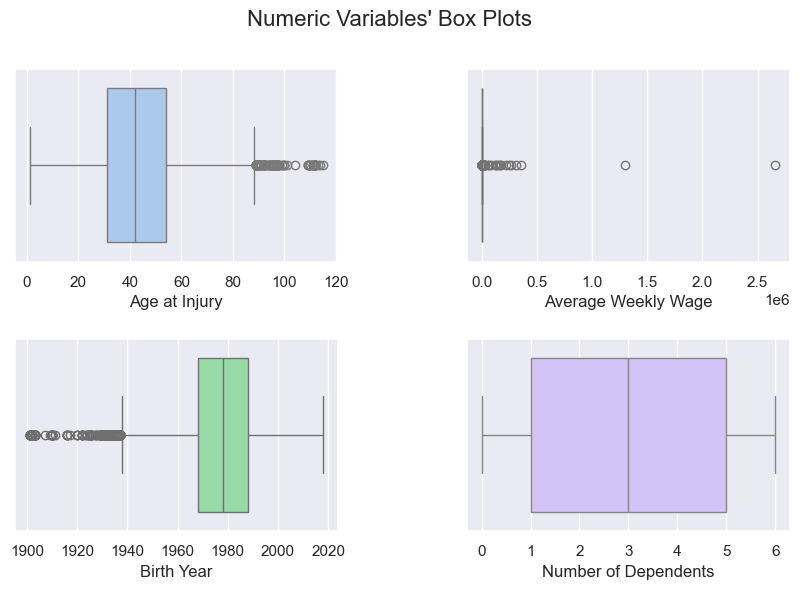

In [78]:
filters_manual1 = (
                (X_train["Age at Injury"] <= 100)
                &
                (X_train["Average Weekly Wage"] <= 0.3*1e6)
                &
                (X_train["Birth Year"] >= 1950)                            
                #&
                #(X_train["Number of Dependents"])                        #There are no outliers here, so I think there is no manual restriction to make
)
X_train_out_man = X_train[filters_manual1]

In [ ]:
print('Percentage of data kept after removing outliers:', 100*(np.round(X_train_out_man.shape[0] / X_train.shape[0], decimals=5)))

In [ ]:
X_train_out = X_train[(filters_iqr_all | filters_manual1)]            #Only if the 2 filter says that the observation are outliers we remove!


print('Percentage of data kept after removing outliers:', 100*np.round(X_train_out.shape[0] / X_train.shape[0], 4))

## 3. Data Transformation  Encoding and Scaling 

In [81]:
age_ranges = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99", "100+"]

def determine_age_range(age):
    if age < 10:
        return age_ranges[0]
    elif age < 20:
        return age_ranges[1]
    elif age < 30:
        return age_ranges[2]
    elif age < 40:
        return age_ranges[3]
    elif age < 50:
        return age_ranges[4]
    elif age < 60:
        return age_ranges[5]
    elif age < 70:
        return age_ranges[6]
    elif age < 80:
        return age_ranges[7]
    elif age < 90:
        return age_ranges[8]
    elif age < 100:
        return age_ranges[9]
    else:
        return age_ranges[10] 
    
to_be_dropped = ['Age at Injury', 'C-2 Date', 'Birth Year', 'Accident Date', 'Assembly Date']
    
X_train["Age at Injury Range"] = X_train["Age at Injury"].map(determine_age_range)
X_val["Age at Injury Range"] = X_val["Age at Injury"].map(determine_age_range)

X_train.drop(to_be_dropped, axis=1, inplace=True)
X_val.drop(to_be_dropped, axis=1, inplace=True)


In [65]:
# e.g changing into binary vairables etc

In [ ]:
train_data.info()

# 4. Correlations and multivariate analysis - Victoria

In [ ]:
fig = plt.figure(figsize=(10, 8))

# Use spearman correlation 
corr = train_data[metric_features].corr(method="spearman").round(3)

# Plot heatmap
sns.heatmap(data=corr, annot=True, 
            # fmt='s',
            vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

"Birth Year" and "Age at Injury" are highly negatively correlated. Can be dropped. All other metric variables seem independent from each other.

In [68]:
# probably remove Birth Year here?

From a logical point of view, having an attorney/representative when a hearing has been required should prove to have better results than when one isn't present. In the below heat map, the cross tabular of the two variables, "Attorney/Representative" and "First Hearing Date Binary", are shown.

In [ ]:
# Test cross tabular 
cross = pd.crosstab(train_data["Attorney/Representative"], train_data['First Hearing Date Binary'], normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

Only 5% of folks who had a "First Hearing Date" did NOT have an attorney and 9% had an attorney but no hearing date. These situations are a little unusual but not strange. Not having an attorney when there is no hearing date is expected.

Looking at the below, the distribution of "Claim Injury Types" is quite even throughout, whereas the distribution for when data for the "First Hearing Date" wasn't available. "Non-Comp" seems to be the predominate value.

In [ ]:
catpc_df = train_data.groupby(["First Hearing Date Binary", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
catpc_df.plot.bar(stacked=True)
plt.show()

Examining the below histogram for when an attonrey/representative is present or not, for when an attonrey/representative isn't present, the values seem more imbalanced with supports the initial hypothesis that if an attorney is involved, the claim injury being compensated is less likely.

In [ ]:
cat_df = train_data.groupby(["Attorney/Representative", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Compare "Attorney/Representative" vs "First Hearing Date Binary" for when there is no attorney and there is no first hearing date. The wide imbalance shows that this could be a particular variable relationship that could help with deciding Claim Injury Type.

In [ ]:
attorney_data = train_data[ (train_data["Attorney/Representative"] == "N")]
cat_df = attorney_data.groupby(["First Hearing Date Binary", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("First Hearing Date Distribution when No Attorney is Present")
plt.show()

Compare "Attorney/Representative" vs "First Hearing Date Binary" for when there is an attorney. Compared to the last histogram, this one's values are more balanced. This further concludes that the presence of an attorney helps with the distribution of Claim injury Type.

In [ ]:
attorney_data = train_data[ (train_data["Attorney/Representative"] == "Y")]
cat_df = attorney_data.groupby(["First Hearing Date Binary", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("First Hearing Date Distribution when an Attorney is Present")
plt.show()

If an attorney isn't needed, the "Alternative Distribution Resolution" could play a part in deciding the Claim Injury Type. Let's examine the dsitribution of "Claim Injury Type" and "Alternative Dispute Resolution".

In [ ]:
cat_df = train_data.groupby(["Alternative Dispute Resolution", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

There are barely any instances where Alternative Distribution is "Y".

In [ ]:
train_data.groupby("Alternative Dispute Resolution")["Alternative Dispute Resolution"].value_counts()

With there being only 34 values where the resolution is "Y", the possibility that it helped with desicions is low. <br/> <br/>
Whereas the distribution for Attorney/Representative is much higher (as seen below). 

In [ ]:
train_data.groupby("Attorney/Representative")["Attorney/Representative"].value_counts()

In [ ]:
cat_df = train_data.groupby(["Medical Fee Region", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = train_data.groupby(["Carrier Type", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cross = pd.crosstab(train_data["Medical Fee Region"], train_data['Carrier Type'], normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

In [ ]:
cat_df = train_data.groupby(["Age at Injury", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

There seems to be an even distribution between claim injury types and gender. (Probably won't play much of a role in deciding claim type)

In [ ]:
cat_df = train_data.groupby(["Gender", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Predominatley male dataset - most likely due to the nature of work.

In [ ]:
# needs outlier fixes
catpc_df = train_data.groupby(["Age at Injury", 'Gender'])['Gender'].size().unstack()
catpc_df.plot.bar(stacked=True)
plt.show()

Predomintantly using zip codes based in category 1. This includes NY, Delaware, and Pennsylvania. Given that the organization is for the state of New York, it makes sense that a majority of the variables will be based in the zipcode category that New York belongs to. Using District Name will be more useful. This is potentially ground to remove the zipcode columns.

In [ ]:
cat_df = train_data.groupby(['zip_code_cat', "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = train_data.groupby(['District Name', "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

The percentage of "Non-comp" injury types in NYC is well above the rest of the districts. Potentially high ocurances of fraud in big cities?

In [ ]:
cross = pd.crosstab(train_data["District Name"], train_data['Claim Injury Type'], normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

In [ ]:
# needs outlier fixes
sns.set_style('ticks')
fig, ax = plt.subplots()
hb = ax.hexbin(train_data["Age at Injury"], train_data["Average Weekly Wage"], gridsize=20)
ax.set_title("Hexagon binning for age and income")
cb = fig.colorbar(hb, ax=ax, label='counts')
plt.show()

In [ ]:
cat_df = train_data.groupby(['COVID-19 Indicator', "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Taking a closer look at when the COVID Indicator is "Y". <br/>
<br/>
It seems whenever covid is present, the chance that it will be marked as "Non-comp" is higher.

In [ ]:
covid_data = train_data[ train_data["COVID-19 Indicator"] == "Y"]
cat_df = covid_data.groupby(['COVID-19 Indicator', "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("Claim Injry Distribution when COVID-19 is marked")
plt.show()

The distribution of claim types on the number dependants is distributed evenly implying number of dependents have no weight on the claim injury type.

In [ ]:
cat_df = train_data.groupby(["Number of Dependents", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = train_data.groupby(["WCIO Nature of Injury Code", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = train_data.groupby(["WCIO Part Of Body Code", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = train_data.groupby(["WCIO Cause of Injury Code", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
train_data.nunique()

In [ ]:
# List of categorical variables to plot
independent_var = ['Age at Injury','Alternative Dispute Resolution',
       'Attorney/Representative', 
       'Birth Year', 'Carrier Type', 
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Agreement Reached', 'Number of Dependents', 'zip_code_cat',
       'First Hearing Date Binary']
# Add more variables to independent_var as needed

# Target variable (for example purposes)
target_variable = "Claim Injury Type"

# Loop through each variable and plot a stacked bar chart
for var in independent_var:
    # Group by the current variable and target, then unstack to get counts in a DataFrame
    catpc_df = train_data.groupby([var, target_variable])[target_variable].size().unstack()
    
    # Plot stacked bar chart
    catpc_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="tab20")
    
    # Add title and labels
    plt.title(f"Stacked Bar Plot of {var} by {target_variable}")
    plt.xlabel(var)
    plt.ylabel("Count")
    
    # Display plot
    plt.tight_layout()  # Adjust layout to fit titles and labels
    plt.show()

In [ ]:
train_data.info()

In [ ]:
test_data.info()

In [89]:
#### Convert birth year into age:

In [90]:
train_data["Birth Year"]= datetime.now().year - train_data["Birth Year"]

# 5. Feature Engineering - Marta

In [ ]:
train_data["Days Between Accident_Assembly"] = train_data['Assembly Date'] - train_data['Accident Date']
print(f"maximum days between assembly: {train_data['Days Between Accident_Assembly'].max()}")
print(f"minimum days between assembly: {train_data['Days Between Accident_Assembly'].min()}") 
# strange values assembly date < accident date?? 
# #same max & min as days between accident and C2.

In [ ]:
train_data["Days Between Accident_C2"] = train_data['C-2 Date'] - train_data['Accident Date']
print(f"maximum days between assembly: {train_data['Days Between Accident_C2'].max()}")
print(f"minimum days between assembly: {train_data['Days Between Accident_C2'].min()}") 
# strange values C2 date < accident date?? 
# #same max & min as days between accident and C2.

#### Group descriptions by code: 

In [ ]:
group_by_industry = train_data.groupby("Industry Code")["Industry Code Description"].unique()
group_by_industry

# Different codes with same description

In [ ]:
group_by_injury = train_data.groupby("WCIO Cause of Injury Code")["WCIO Cause of Injury Description"].unique()
group_by_injury

# Different codes with same description

In [ ]:
group_by_body_part = train_data.groupby("WCIO Part Of Body Code")["WCIO Part Of Body Description"].unique()
group_by_body_part

# different codes with the same description

## 5. Defining target variable

In [85]:
x = train_data.drop('Claim Injury Type', axis = 1) # axis=1 means the operation must be done on columns
y = train_data['Claim Injury Type'] 

In [86]:
### Define metric & non-metric features
metric_features = ["Age at Injury", "Average Weekly Wage", "Birth Year", "IME-4 Count", "Number_of_Dependents", "Days Between Accident_Assembly", "Days Between Accident_C2", 
                   "Days Between Accident_C3", "Days Between Accident_1st_Hearing"]

non_metric_features = ["Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code", "Accident Date", "Alternative Dispute Resolution",
                       "Assembly Date", "Attorney/Representative", "C-2 Date", "C-3 Date", "Carrier Name", "Carrier Type", "County of Injury", "COVID-19 Indicator",
                       "District Name", "First Hearing Date", "Gender", "Industry Code Description", "Medical Fee Region", "WCIO Cause of Injury Description", 
                       "WCIO Nature of Injury Description", "WCIO Part Of Body Description", "Zip Code", "Agreement Reached", "WCB Decision"]

